In [15]:
# import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
import matplotlib.pylab as plt

In [2]:
# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
img_x, img_y = x_train[0].shape
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)

input_shape = (img_x, img_y, 1)

In [4]:
batch_size = 128
num_classes = 10
epochs = 10
learning_rate = 0.0001
epochs = 10
batch_size = 50

In [5]:
# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# Logging metrics in Keras, imports callback class
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
history = AccuracyHistory()

In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

In [10]:
# training the model
model.fit(x_train,
          y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data=(x_test,y_test),
          callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 56s 934us/step - loss: 0.1080 - acc: 0.9663 - val_loss: 0.0393 - val_acc: 0.9868
Epoch 2/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0368 - acc: 0.9886 - val_loss: 0.0403 - val_acc: 0.9856
Epoch 3/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0245 - acc: 0.9922 - val_loss: 0.0272 - val_acc: 0.9909
Epoch 4/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0194 - acc: 0.9939 - val_loss: 0.0261 - val_acc: 0.9930
Epoch 5/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0144 - acc: 0.9954 - val_loss: 0.0264 - val_acc: 0.9917
Epoch 6/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0120 - acc: 0.9962 - val_loss: 0.0292 - val_acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0108 - acc: 0.9967 - val_loss: 0.0251 - val_a

In [11]:
# calculating the accuracy
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0359493981825
Test accuracy: 0.9919


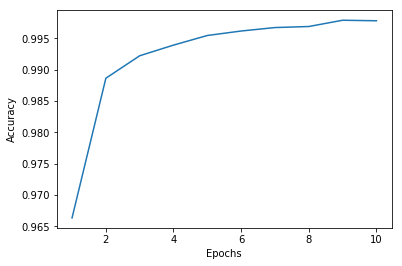

In [16]:
# plotting the accuracy
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()